## SF_temps

In [1]:
import pandas as pd
from vega_datasets import data

In [2]:
df = data.sf_temps()

In [3]:
df = df.set_index('date').sort_index()

In [4]:
df

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


<AxesSubplot:xlabel='date'>

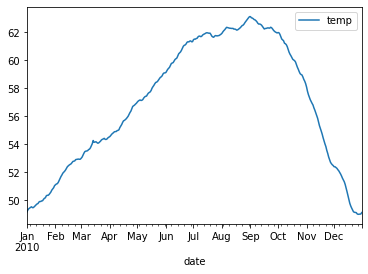

In [5]:
# Resample by the day and take the average temperature. Visualize the average temperature over time.

df_day = df.resample('D').mean()
df_day.plot()

<AxesSubplot:xlabel='date'>

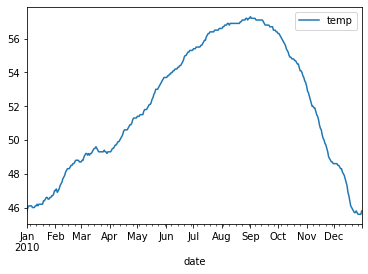

In [6]:
# Write the code necessary to visualize the minimum temperature over time.

min_plot = df.resample('D').min()
min_plot.plot()

<AxesSubplot:xlabel='date'>

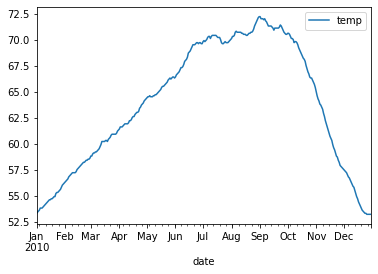

In [7]:
# Write the code necessary to visualize the maximum temperature over time.

max_plot = df.resample('D').max()
max_plot.plot()

In [8]:
# Which month is the coldest, on average?
# January
# Which month has the highest average temperature?
# September

df_month = df.resample('M').mean()
df_month

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968
2010-06-30,60.444722
2010-07-31,61.765457
2010-08-31,62.405376
2010-09-30,62.487083


In [9]:
# Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). 
# Use this resampled dataframe to calculate the change in temperature for the day. 

min_max = df.resample('D').agg(['min', 'max'])
min_max['difference'] = min_max.temp['max'] - min_max.temp['min']

In [10]:
min_max = min_max.resample('M').mean()

In [11]:
# Which month has the highest daily temperature variability?
# September

min_max

temp            difference
                  min        max           
date                                       
2010-01-31  46.309677  54.651613   8.341935
2010-02-28  48.064286  57.550000   9.485714
2010-03-31  49.238710  60.093548  10.854839
2010-04-30  50.326667  62.646667  12.320000
2010-05-31  52.403226  65.312903  12.909677
2010-06-30  54.480000  68.430000  13.950000
2010-07-31  56.045161  70.022581  13.977419
2010-08-31  56.941935  70.812903  13.870968
2010-09-30  56.903333  71.306667  14.403333
2010-10-31  54.932258  68.364516  13.432258
2010-11-30  50.776667  61.013333  10.236667
2010-12-31  47.025806  54.951613   7.925806

<AxesSubplot:xlabel='date'>

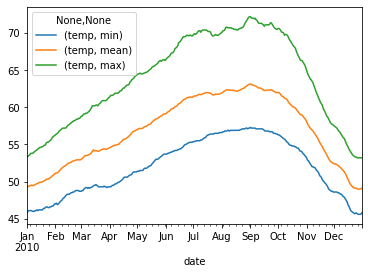

In [12]:
# Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, 
# average, and maximum temperature should be 3 seperate lines.

df_plot = df.resample('D').agg(['min', 'mean', 'max'])
df_plot.plot()

## Seattle weather

In [20]:
from vega_datasets import data
df = data.seattle_weather()
df = df.set_index('date').sort_index()

In [25]:
# Which year and month combination has the highest amount of precipitation?

month_rain = df.resample('M').sum()
maxit = month_rain[month_rain['precipitation'] == month_rain.precipitation.max()]
maxit

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,284.5,259.8,118.6,134.6


<AxesSubplot:xlabel='date'>

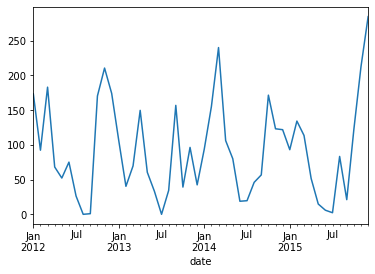

In [26]:
# Visualize the amount of monthly precipitation over time.

month_rain.precipitation.plot()

<AxesSubplot:xlabel='date'>

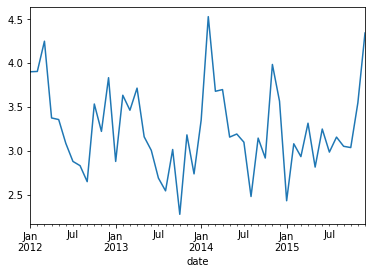

In [36]:
# Visualize the amount of wind over time. Choose a time interval you think is appropriate. (Amount of wind???)

avg_wind = df.resample('M').mean()
avg_wind.wind.plot()

In [37]:
# Which year-month combination is the windiest?
# February 2014

maxit = avg_wind[avg_wind['wind'] == avg_wind.wind.max()]
maxit

,precipitation,temp_max,temp_min,wind
date,,,,
2014-02-28,5.542857,8.2,2.635714,4.528571


In [44]:
avg_wind.wind.idxmax()

Timestamp('2014-02-28 00:00:00', freq='M')

In [50]:
# What's the sunniest year?
# 2014

sun = df[df['weather'] == 'sun']
sun.resample('Y').weather.count()

date
2012-12-31    118
2013-12-31    205
2014-12-31    211
2015-12-31    180
Freq: A-DEC, Name: weather, dtype: int64

In [54]:
# In which month does it rain the most?

df.resample('M').sum().precipitation.idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

In [58]:
# Which month has the most number of days with a non-zero amount of precipitation?
# December 2012

always_rain = df[df['precipitation'] != 0]
always_rain.resample('M').weather.count()

date
2012-01-31    22
2012-02-29    19
2012-03-31    22
2012-04-30    17
2012-05-31    10
2012-06-30    14
2012-07-31     7
2012-08-31     0
2012-09-30     3
2012-10-31    16
2012-11-30    20
2012-12-31    27
2013-01-31    17
2013-02-28    18
2013-03-31    15
2013-04-30    16
2013-05-31    12
2013-06-30    10
2013-07-31     0
2013-08-31     9
2013-09-30    14
2013-10-31    12
2013-11-30    15
2013-12-31    14
2014-01-31    13
2014-02-28    19
2014-03-31    20
2014-04-30    13
2014-05-31     8
2014-06-30     9
2014-07-31     2
2014-08-31     7
2014-09-30     9
2014-10-31    19
2014-11-30    16
2014-12-31    15
2015-01-31    14
2015-02-28    17
2015-03-31    16
2015-04-30    13
2015-05-31     4
2015-06-30     4
2015-07-31     2
2015-08-31     6
2015-09-30     9
2015-10-31    14
2015-11-30    20
2015-12-31    25
Freq: M, Name: weather, dtype: int64

## Flights

In [82]:
df = data.flights_20k()
df

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,-6,1489,SEA,MCI
19997,2001-02-07 11:37:00,-16,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


In [83]:
# Convert any negative delays to 0.

df['delay'] = df.delay.apply(lambda x: 0 if x < 0 else x)

In [88]:
# Which hour of the day has the highest average delay?
# 3 AM

df['hour'] = df.date.dt.hour
df.groupby('hour').delay.mean()

hour
0     127.916667
1     170.000000
3     302.500000
5       0.513514
6       2.494856
7       3.071932
8       4.030483
9       5.002504
10      5.850953
11      7.361495
12      9.214341
13     11.453311
14     10.747320
15     13.137592
16     13.881068
17     13.199580
18     14.514218
19     16.256557
20     17.889778
21     21.626768
22     32.704607
23     65.353846
Name: delay, dtype: float64

In [99]:
# Does the day of the week make a difference in the delay amount?
# Yes

df['weekday'] = df.date.dt.day_name()
df.groupby('weekday').delay.mean()

weekday
Friday       17.757596
Monday        7.165772
Saturday      8.431498
Sunday       10.413542
Thursday     12.821322
Tuesday       9.410866
Wednesday    11.032478
Name: delay, dtype: float64

In [101]:
# Does the month make a difference in the delay amount?

df = df.set_index('date').sort_index()
df.resample('M').mean()

,delay,distance,hour
date,,,
2001-01-31,11.301592,500.391952,13.552771
2001-02-28,12.306106,511.156170,13.644182
2001-03-31,9.875287,504.712069,13.531897
